# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Load information abou the api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

# Build partial url
query_url = f"{url}appid={api_key}&units={units}&q="

# Create dataframe and add columns
cities_df = pd.DataFrame({'City':cities})
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

# Use iterrows to iterate through cities dataframe
for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['City']

    # assemble url and make API request   
    response = requests.get(query_url+city).json()

    try:     
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index,'Country'] = response['sys']['country']
        cities_df.loc[index,'Date'] = response['dt']
        cities_df.loc[index,'Humidity'] = response['main']['humidity']
        cities_df.loc[index,'Lat'] = response['coord']['lat']
        cities_df.loc[index,'Lng'] = response['coord']['lon']
        cities_df.loc[index,'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        print(f"Retrived information for country {response['id']} | {response['name']}.")
    
    except (KeyError, IndexError):
        print(f"{city.capitalize()} not found. Skipping.")
        
    print("------------")


rmation for country 281133 | Gaza.
------------
Retrived information for country 1337606 | Eydhafushi.
------------
Retrived information for country 1106677 | Bambous Virieux.
------------
Retrived information for country 5134295 | Rome.
------------
Retrived information for country 2172880 | Byron Bay.
------------
Retrived information for country 5919850 | Chapais.
------------
Stoyba not found. Skipping.
------------
Retrived information for country 4328254 | Iberia.
------------
Retrived information for country 4946620 | Palmer.
------------
Retrived information for country 2396518 | Port-Gentil.
------------
Grande-riviere not found. Skipping.
------------
Retrived information for country 1633419 | Padang.
------------
Retrived information for country 2027296 | Aykhal.
------------
Retrived information for country 3372472 | Vila Franca do Campo.
------------
Retrived information for country 3357804 | Eenhana.
------------
Retrived information for country 5379439 | Ontario.
-------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = cities_df.replace('',np.nan)
cities_df.count()

City          630
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [5]:
cities_df = cities_df.dropna(how='any')
cities_df = cities_df.reset_index(drop=True)
cities_df.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [6]:
cities_df.to_csv('cities.csv')
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75.0,US,1.582838e+09,47.0,42.60,-73.97,1.67,9.80
1,iqaluit,20.0,CA,1.582838e+09,68.0,63.75,-68.51,-27.78,1.00
2,mar del plata,0.0,AR,1.582838e+09,30.0,-38.00,-57.56,31.67,7.20
3,hofn,100.0,IS,1.582838e+09,78.0,64.25,-15.21,0.01,14.18
4,punta arenas,20.0,CL,1.582838e+09,54.0,-53.15,-70.92,14.00,16.50
...,...,...,...,...,...,...,...,...,...
572,kidal,0.0,ML,1.582838e+09,8.0,18.44,1.41,21.86,3.91
573,kralendijk,75.0,BQ,1.582838e+09,62.0,12.15,-68.27,30.00,5.10
574,coahuayana,40.0,MX,1.582838e+09,54.0,18.73,-103.68,27.00,2.60
575,kloulklubed,90.0,PW,1.582838e+09,88.0,7.04,134.26,26.00,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
#  Change values of cities dataframe to numeric to plot them
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Lng'] = pd.to_numeric(cities_df['Lng'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

# Declare variables
clouds = cities_df['Cloudiness']
humidity = cities_df['Humidity']
lat = cities_df['Lat']
lng = cities_df['Lng']
max_temp = cities_df['Max Temp']
wind_speed = cities_df['Wind Speed']

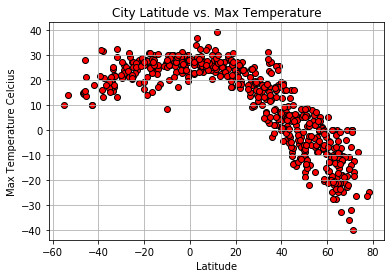

In [8]:
plt.scatter(lat,max_temp, edgecolors='black',c='red')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.grid()
plt.savefig('lat-vs-max_temp')
plt.show()

Note: In this fig we can see that as we get away from the Equator the max temperature decreses, but we see a more significant decrease in the north of the planet.

#### Latitude vs. Humidity Plot

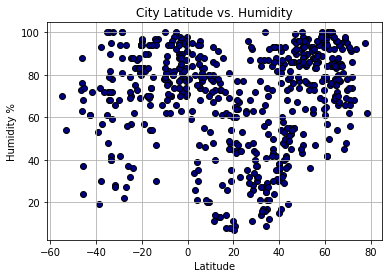

In [9]:
plt.scatter(lat,humidity, edgecolors='black',c='navy')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig('lat-vs-humidity')
plt.show()

Note: As far as this chart shows, there is no relation between the latitude and the % humidity

#### Latitude vs. Cloudiness Plot

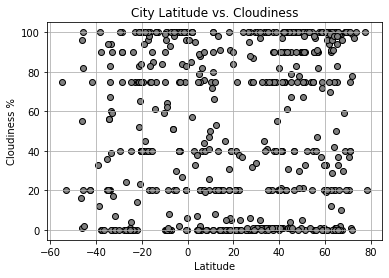

In [10]:
plt.scatter(lat,clouds, edgecolors='black',c='gray')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig('lat-vs-clouds')
plt.show()

Note: as far as this chart shows, there is no relation between the latitude and the % of clouds.

#### Latitude vs. Wind Speed Plot

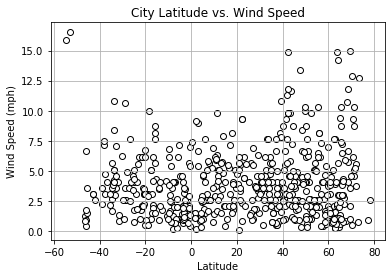

In [11]:
plt.scatter(lat,wind_speed, edgecolors='black',c='white')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('lat-vs-wind_speed')
plt.show()

Note: as far as this chart shows, there is no relation between the latitude and the wind speed

## Linear Regression

### OPTIONAL: Create a function to create Linear Regression plots


#### Create Northern and Southern Hemisphere DataFrames


In [12]:
# Separe the hemisphere
north = cities_df.loc[cities_df['Lat']>=0]
south = cities_df.loc[cities_df['Lat']<0]

# Declare south variables
sclouds = south['Cloudiness']
shumidity = south['Humidity']
slat = south['Lat']
slng = south['Lng']
smax_temp = south['Max Temp']
swind_speed = south['Wind Speed']

# Declare north variables
nclouds = north['Cloudiness']
nhumidity = north['Humidity']
nlat = north['Lat']
nlng = north['Lng']
nmax_temp = north['Max Temp']
nwind_speed = north['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.891


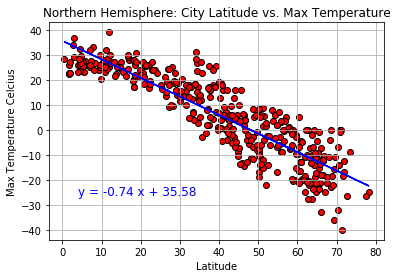

In [13]:
nmaxtemp_slope, nmaxtemp_int, nmaxtemp_r, nmaxtemp_p, nmaxtemp_std_err = st.linregress(nlat, nmax_temp)
nmaxtemp_fit = nmaxtemp_slope * nlat + nmaxtemp_int
line_eq = f'y = {str(round(nmaxtemp_slope,2))} x + {str(round(nmaxtemp_int,2))}'

print(f'The r-squared is: {round(nmaxtemp_r,3)}')

plt.scatter(nlat,nmax_temp, edgecolors='black',c='red')
plt.plot(nlat,nmaxtemp_fit,"b-")
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.annotate(line_eq,(4,-26),fontsize=12,c='blue')
plt.grid()
plt.savefig('north-lat-vs-max_temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.568


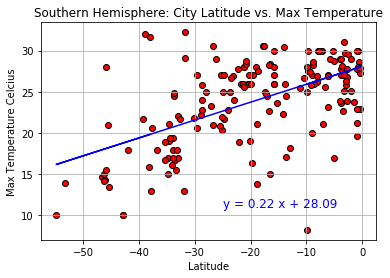

In [15]:
smaxtemp_slope, smaxtemp_int, smaxtemp_r, smaxtemp_p, smaxtemp_std_err = st.linregress(slat, smax_temp)
smaxtemp_fit = smaxtemp_slope * slat + smaxtemp_int
line_eq = f'y = {str(round(smaxtemp_slope,2))} x + {str(round(smaxtemp_int,2))}'

print(f'The r-squared is: {round(smaxtemp_r,3)}')

plt.scatter(slat,smax_temp, edgecolors='black',c='red')
plt.plot(slat,smaxtemp_fit,"b-")
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.annotate(line_eq,(-25,11),fontsize=12,c='blue')
plt.grid()
plt.savefig('south-lat-vs-max_temp')
plt.show()

As we stated before, the temperatures drop as we get away from the Equator more pronounce in the northern hemisphere, probably due earth oval shape. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.365


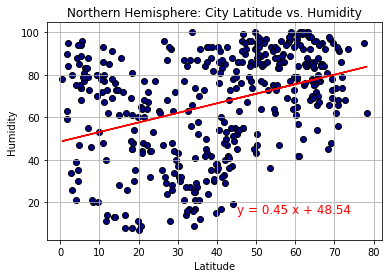

In [16]:
nhumidity_slope, nhumidity_int, nhumidity_r, nhumidity_p, nhumidity_std_err = st.linregress(nlat, nhumidity)
nhumidity_fit = nhumidity_slope * nlat + nhumidity_int
line_eq = f'y = {str(round(nhumidity_slope,2))} x + {str(round(nhumidity_int,2))}'

print(f'The r-squared is: {round(nhumidity_r,3)}')

plt.scatter(nlat,nhumidity, edgecolors='black',c='navy')
plt.plot(nlat,nhumidity_fit,"r-")
plt.title('Northern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,15),fontsize=12,c='red')
plt.grid()
plt.savefig('north-lat-vs-humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.376


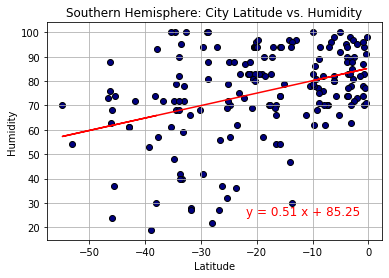

In [18]:
shumidity_slope, shumidity_int, shumidity_r, shumidity_p, shumidity_std_err = st.linregress(slat, shumidity)
shumidity_fit = shumidity_slope * slat + shumidity_int
line_eq = f'y = {str(round(shumidity_slope,2))} x + {str(round(shumidity_int,2))}'

print(f'The r-squared is: {round(shumidity_r,3)}')

plt.scatter(slat,shumidity, edgecolors='black',c='navy')
plt.plot(slat,shumidity_fit,"r-")
plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-22,25),fontsize=12,c='red')
plt.grid()
plt.savefig('south-lat-vs-humidity')
plt.show()

The behaviour in both hemispheres are similar (mirroring), both with a +- 0.5 slope and a r-squared of 0.387 and 0.358 respectively

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.196


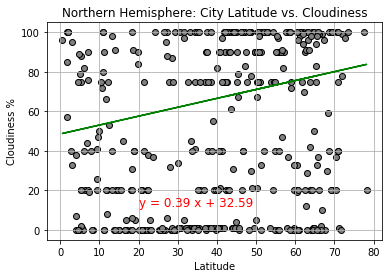

In [20]:
nclouds_slope, nclouds_int, nclouds_r, nclouds_p, nclouds_std_err = st.linregress(nlat, nclouds)
nclouds_fit = nclouds_slope * nlat + nclouds_int
line_eq = f'y = {str(round(nclouds_slope,2))} x + {str(round(nclouds_int,2))}'

print(f'The r-squared is: {round(nclouds_r,3)}')

plt.scatter(nlat,nclouds, edgecolors='black',c='gray')
plt.plot(nlat,nhumidity_fit,"g-")
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(20,12),fontsize=12,c='red')
plt.grid()
plt.savefig('north-lat-vs-clouds')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.241


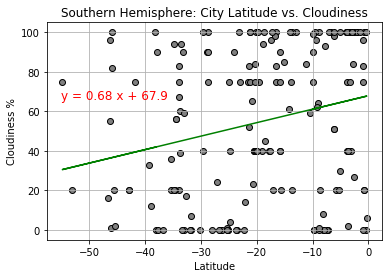

In [22]:
sclouds_slope, sclouds_int, sclouds_r, sclouds_p, sclouds_std_err = st.linregress(slat, sclouds)
sclouds_fit = sclouds_slope * slat + sclouds_int
line_eq = f'y = {str(round(sclouds_slope,2))} x + {str(round(sclouds_int,2))}'

print(f'The r-squared is: {round(sclouds_r,3)}')

plt.scatter(slat,sclouds, edgecolors='black',c='gray')
plt.plot(slat,sclouds_fit,"g-")
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-55,66),fontsize=12,c='red')
plt.grid()
plt.savefig('south-lat-vs-clouds')
plt.show()

There seems to be a higher correlation between the southern hemisphere than in the northern hemisphere. And is notorious that both hemisphere behave similar instead of in a mirroring way as would be standard.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.079


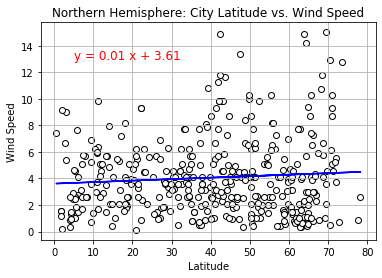

In [23]:
nwind_speed_slope, nwind_speed_int, nwind_speed_r, nwind_speed_p, nwind_speed_std_err = st.linregress(nlat, nwind_speed)
nwind_speed_fit = nwind_speed_slope * nlat + nwind_speed_int
line_eq = f'y = {str(round(nwind_speed_slope,2))} x + {str(round(nwind_speed_int,2))}'

print(f'The r-squared is: {round(nwind_speed_r,3)}')

plt.scatter(nlat,nwind_speed, edgecolors='black',c='white')
plt.plot(nlat,nwind_speed_fit,"b-")
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,13),fontsize=12,c='red')
plt.grid()
plt.savefig('north-lat-vs-wind_speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.311


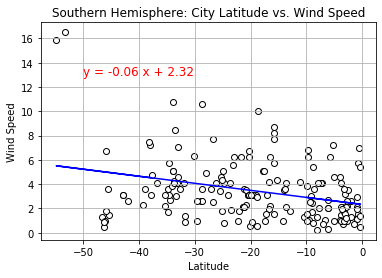

In [24]:
swind_speed_slope, swind_speed_int, swind_speed_r, swind_speed_p, swind_speed_std_err = st.linregress(slat, swind_speed)
swind_speed_fit = swind_speed_slope * slat + swind_speed_int
line_eq = f'y = {str(round(swind_speed_slope,2))} x + {str(round(swind_speed_int,2))}'

print(f'The r-squared is: {round(swind_speed_r,3)}')

plt.scatter(slat,swind_speed, edgecolors='black',c='white')
plt.plot(slat,swind_speed_fit,"b-")
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,13),fontsize=12,c='red')
plt.grid()
plt.savefig('south-lat-vs-wind_speed')
plt.show()

There seems to be no significant correlation between the latitude and the wind speed.